Exercício 8 - Enunciado:

Foram coletados dados sobre a quantidade de chuva por dia (em milímetros),
durante 14 dias, para dois locais distintos. O pesquisador notou que o local A
aparenta ter maior variabilidade na quantidade chuva, comparativamente ao
local B. Neste sentido, deseja testar a hipótese de que a variabilidade na
quantidade de chuva é significativamente maior em A do que em B. Realize o
teste F para testar tal hipótese.

In [23]:
# importando dados
import os
import pandas as pd

current_dir = os.getcwd()
data_path = os.path.abspath(os.path.join(current_dir, '..', 'Data'))
file = os.path.join(data_path, 'Lista de Exercicios - Complementaresxlsx Portugues.xlsx')
dados = pd.read_excel(file, sheet_name = 'Exercício 8')

dados.head()

,Local A (mm),Local B (mm),Unnamed: 2,Unnamed: 3,Variâncias,Unnamed: 5,Unnamed: 6,Unnamed: 7,Teste-F: duas amostras para variâncias,Unnamed: 9,Unnamed: 10
0,8.9,5.6,NaN,Local A,11.604396,NaN,NaN,NaN,NaN,NaN,NaN
1,7.7,4.9,NaN,Local B,4.202692,NaN,NaN,NaN,NaN,Local A (mm),Local B (mm)
2,8.6,6.6,NaN,NaN,NaN,NaN,NaN,NaN,Média,6.285714,6.85
3,3.9,5.9,NaN,Teste F Variâncias,2.761181,NaN,NaN,NaN,Variância,11.604396,4.202692
4,7.6,6.5,NaN,Nível de Significância,0.050000,NaN,NaN,NaN,Observações,14,14


In [24]:
# Selecionando os dados 
dados = dados[['Local A (mm)', 'Local B (mm)']]
dados = dados.reset_index(drop=True)
dados.insert(0, 'dia', dados.index + 1)
dados

,dia,Local A (mm),Local B (mm)
0,1,8.9,5.6
1,2,7.7,4.9
2,3,8.6,6.6
3,4,3.9,5.9
4,5,7.6,6.5
5,6,10.2,5.9
6,7,9.6,3.6
7,8,8.9,5.6
8,9,9.6,8.8
9,10,5.5,7.8


In [25]:
# Verificando a existência de dados nulos
dados.isnull().sum()

dia             0
Local A (mm)    0
Local B (mm)    0
dtype: int64

In [26]:
# Verificando algumas métricas
dados.describe()

,dia,Local A (mm),Local B (mm)
count,14.0000,14.000000,14.000000
mean,7.5000,6.285714,6.850000
std,4.1833,3.406523,2.050047
min,1.0000,0.500000,3.600000
25%,4.2500,3.925000,5.600000
50%,7.5000,7.650000,6.200000
75%,10.7500,8.900000,8.175000
max,14.0000,10.200000,11.000000


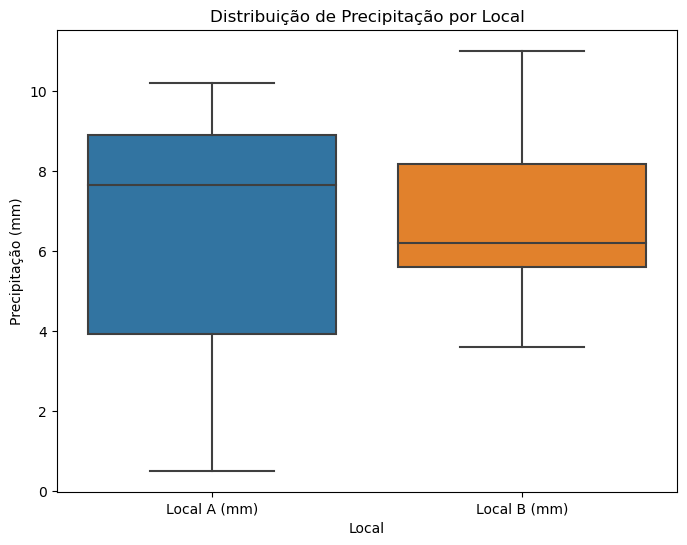

In [27]:
# Plotando boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Transformar o DataFrame para formato longo
df_long = pd.melt(dados, id_vars='dia', value_vars=['Local A (mm)', 'Local B (mm)'],
                  var_name='Local', value_name='Precipitação')

# Criar o boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Local', y='Precipitação', data=df_long)
plt.title('Distribuição de Precipitação por Local')
plt.ylabel('Precipitação (mm)')
plt.xlabel('Local')
plt.show()

In [42]:
# Teste f para variâncias
from scipy.stats import f

# Variâncias amostrais
var_a = dados['Local A (mm)'].var(ddof=1)
var_b = dados['Local B (mm)'].var(ddof=1)

# Estatística f
F = var_a / var_b

# graus de liberdade
gl1 = len(dados['Local A (mm)']) - 1
gl2 = len(dados['Local B (mm)']) - 1

# valor crítico
valor_critico = f.ppf(0.95, gl1, gl2)

print(f"Variância A: {var_a:.2f}")
print(f"Variância B: {var_b:.2f}")
print(f"Estatística F: {F:.2f}")
print(f"Valor crítico (alpha = 5%): {valor_critico:.2f}")
print("Conclusão:", "Rejeita H0, as amostras indicam que A tem maior variabilidade." if F > valor_critico else "Não rejeita H0")

Variância A: 11.60
Variância B: 4.20
Estatística F: 2.76
Valor crítico (alpha = 5%): 2.58
Conclusão: Rejeita H0, as amostras indicam que A tem maior variabilidade.
